In [ ]:
#mount&Model Prepare
#Food
!unzip /content/drive/MyDrive/train6.zip -d /content/y11test
!cp /content/drive/MyDrive/seaweed_google1.jpg -r /content
#Gym
!cp /content/drive/MyDrive/gym -r /content/y11test

Archive:  /content/drive/MyDrive/train6.zip
   creating: /content/y11test/train6/
   creating: /content/y11test/train6/weights/
 extracting: /content/y11test/train6/weights/best.pt  
 extracting: /content/y11test/train6/weights/last.pt  
 extracting: /content/y11test/train6/train_batch40585.jpg  
 extracting: /content/y11test/train6/train_batch40586.jpg  
 extracting: /content/y11test/train6/val_batch0_labels.jpg  
   creating: /content/y11test/train6/.ipynb_checkpoints/
 extracting: /content/y11test/train6/.ipynb_checkpoints/args-checkpoint.yaml  
 extracting: /content/y11test/train6/.ipynb_checkpoints/results-checkpoint.csv  
 extracting: /content/y11test/train6/train_batch0.jpg  
 extracting: /content/y11test/train6/val_batch2_pred.jpg  
 extracting: /content/y11test/train6/results.png  
 extracting: /content/y11test/train6/val_batch0_pred.jpg  
 extracting: /content/y11test/train6/confusion_matrix.png  
 extracting: /content/y11test/train6/val_batch2_labels.jpg  
 extracting: /cont

In [ ]:
#Prepare - 20241210 photo set
!cp /content/drive/MyDrive/eggtart -r /content/eggtart
!cp /content/drive/MyDrive/latpulld -r /content/latpulld

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 13.3 MB/s eta 0:00:00



image 1/6 /content/eggtart/1.jpg: 640x640 egg_tart 1.00, pie 0.00, pizza 0.00, kaya_toast 0.00, chocolate 0.00, 770.0ms
image 2/6 /content/eggtart/2.jpg: 640x640 egg_tart 1.00, pie 0.00, kaya_toast 0.00, pizza 0.00, muffin 0.00, 750.4ms
image 3/6 /content/eggtart/3.jpg: 640x640 egg_tart 1.00, pie 0.00, kaya_toast 0.00, pizza 0.00, pudding 0.00, 762.6ms
image 4/6 /content/eggtart/4.jpg: 640x640 egg_tart 1.00, pie 0.00, pizza 0.00, kaya_toast 0.00, kebap 0.00, 1180.6ms
image 5/6 /content/eggtart/5.jpg: 640x640 egg_tart 1.00, pie 0.00, kebap 0.00, pizza 0.00, chocolate 0.00, 1191.2ms
image 6/6 /content/eggtart/6.jpg: 640x640 egg_tart 0.96, pie 0.04, kaya_toast 0.00, pizza 0.00, chocolate 0.00, 1188.9ms
Speed: 166.7ms preprocess, 974.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


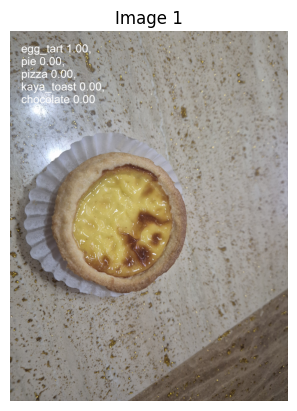

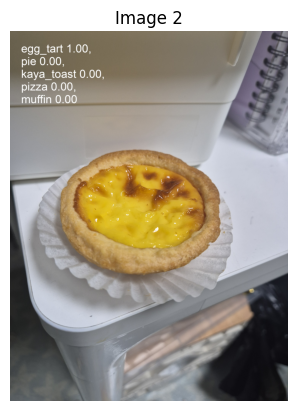

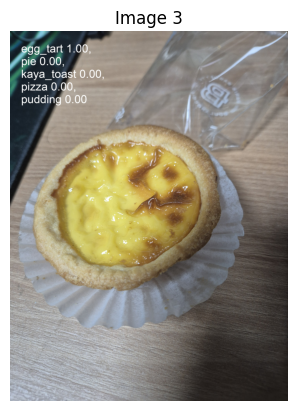

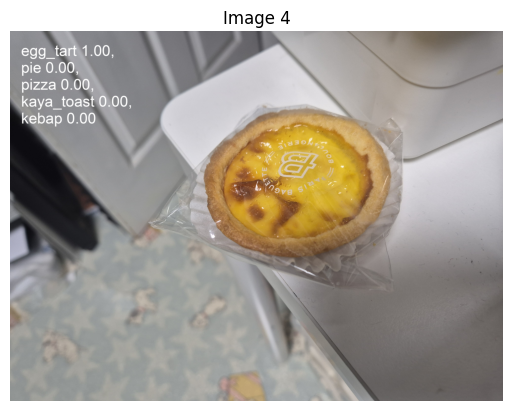

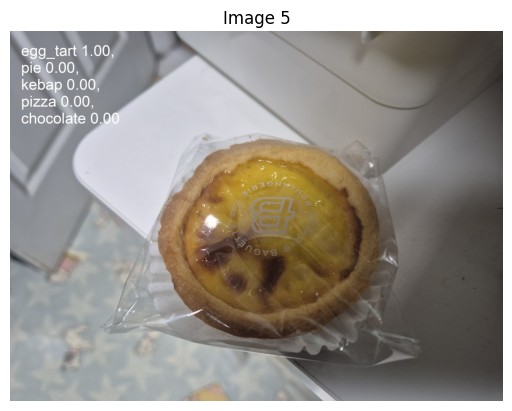

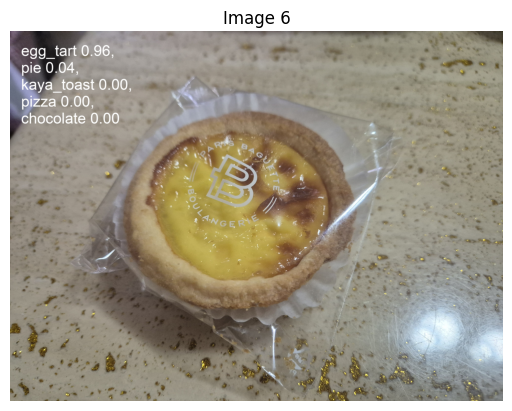

In [42]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# YOLO 모델 로드
model = YOLO('/content/y11test/train6/weights/best.pt') # FOOD
#model = YOLO('/content/y11test/gym/runs/detect/train/weights/best.pt') #Gym Eq

# 이미지 URL 및 예측 수행
results = model.predict(

    #source='/content/eggtart_google1.jpg',   #FOOD #1.00
    #source='/content/seaweed_google1.jpg',   #FOOD #0.99

    source='/content/eggtart/*',  #FOOD #Main TEST 1


    #source='/content/pulld3.jpg',            #Gym Eq #pulld1:0.94, pulld2:0.83, pulld3:0.93

    #source='/content/rack2.jpg',              #Gym Eq #rack1:

    #source='/content/latpulld/*',          #Gym Eq #MAIN TEST 2 #P_Latpulld

    #source='/content/leg1.jpg',                #Gym Eq #legpress machine
    conf=0.25
)

# 각 결과 이미지를 처리
for i, result in enumerate(results):
    # 디텍션된 이미지 가져오기
    annotated_frame = result.plot()  # bounding box와 함께 이미지를 그립니다.

    # 이미지를 PIL 형식으로 변환
    is_success, im_buf_arr = cv2.imencode(".jpg", annotated_frame)
    im_buf_arr = np.frombuffer(im_buf_arr.tobytes(), dtype=np.uint8)
    annotated_image = cv2.imdecode(im_buf_arr, cv2.IMREAD_COLOR)

    # 이미지를 화면에 출력
    plt.figure()  # 새로운 figure를 생성
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # 축 제거
    plt.title(f"Image {i + 1}")  # 이미지 번호 추가
    plt.show()